#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás matrices de confusión y medirás la precisión.
* Graficarás mapas de calor a partir de la matriz de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


**Primera parte**

In [ ]:
# Se importan las librerías que se van a usar en el proyecto.

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  functools import reduce
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Se descarga el archivo y se lo guarda en google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se cargan los datos desde el archivo CSV
df_rrhh = pd.read_csv("/content/drive/MyDrive/rrhh.csv")

In [ ]:
"""Se utiliza la función .info( ) que nos devuelve información(número de filas, número de columnas,
 índices, tipos de las columnas y memoria usada) sobre el data frame."""

df_rrhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


El data frame df_rrhh tiene 1000 filas y 6 columnas. Cada columna tiene 1000 registros es decir, no presenta datos nulos.

In [ ]:
"""
Se utiliza el método .head( ) de pandas para que devuelva las primeras 5 filas del data frame.
De esta manera se busca conocer más acerca de las variables.

 """

df_rrhh.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
# Se utiliza el método .tail( ) de pandas para que devuelva las últimas 5 filas del data frame. De esta manera se busca conocer más acerca de las variables.

df_rrhh.tail()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
995,6.0,Analista,2,1,Bachillerato,21820
996,6.9,Analista,1,0,Licenciatura,34010
997,11.4,Analista,0,0,Licenciatura,38840
998,9.9,Analista,2,1,Bachillerato,45660
999,10.2,Analista,3,1,Bachillerato,55210


El data Frame df_rrhh tiene 6 variables, de las cuales, Salario y Experiencia son cuantitativas, en tanto que, Posición, Hijos, Casado y Educación son cualitativas.

In [ ]:
# Se comprueba la completitud de las variables que componen nuestro conjunto de datos.
completitud = pd.DataFrame(df_rrhh.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df_rrhh.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,Experiencia,0,100.0
1,Posicion,0,100.0
2,Hijos,0,100.0
3,Casado,0,100.0
4,Educacion,0,100.0
5,Salario,0,100.0


Todas las variables que componen la base de datos presentan una completitud del 100 %, por lo que no hay un problema de datos nulos.

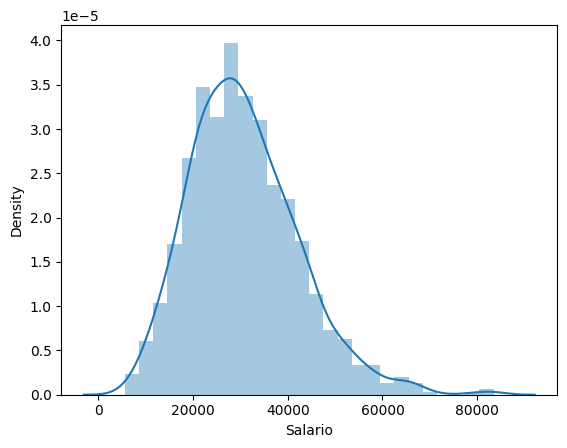

In [ ]:
"""
Se utiliza la función distplot de la librería Seaborn para trazar un histograma
junto con una estimación de la distribución de probabilidad de la variable 'Salario'
del dataframe 'df_rrhh'.

"""
sns.distplot(df_rrhh['Salario']);

# Este comando muestra el gráfico en la ventana de visualización
plt.show()

La gráfica de arriba es una **histograma** e indica cómo se comportan todos los valores que están en la **variable objetivo**, llamada `Salario`.

Se observa que la mayoría de los resultados está por debajo de 45000 pero por encima de 10000 y que los valores arriba de 60000 son muy pocos.

Este tipo de comportamiento se llama **distribución normal**,es decir, la mayoría de los números se concentra en un punto específico y se disipa a lo largo de la recta.

Para complementar el análisis de la variable objetivo obtenido de la gráfica se utilizan dos medidas estadísticas:



In [ ]:
print("Asimetría: %f" % df_rrhh['Salario'].skew())
print("Curtosis: %f" % df_rrhh['Salario'].kurt())

Asimetría: 0.746430
Curtosis: 1.081334


Asimetría (Skewness): Mide la falta de simetría en la distribución de los datos.
Si es cercana a 0, indica que la distribución es simétrica.
Si es mayor que 0, la cola derecha de la distribución es más larga, lo que significa que hay valores más altos que los valores promedio.
Si es menor que 0, la cola izquierda de la distribución es más larga, lo que significa que hay valores más bajos que los valores promedio.
En este caso, una asimetría positiva de 0.746 indica que hay una ligera asimetría hacia la derecha en la distribución de los salarios. Esto significa que puede haber algunos salarios considerablemente más altos que el promedio.

Curtosis: Mide la forma de la distribución en relación con la distribución normal.
Una curtosis igual a 3 implica que la distribución tiene el mismo nivel de concentración en las colas que una distribución normal. Se considera la "normalidad" en términos de la forma de las colas de la distribución.

Una curtosis mayor que 3 indica colas más pesadas y una distribución más puntiaguda que una distribución normal estándar (con colas más anchas y una mayor concentración de valores alrededor de la media).

En este caso, una curtosis de 1.081334 sugiere que la distribución de los salarios tiene colas menos pesadas y es menos puntiaguda que una distribución normal estándar, lo que significa que se asemeja más a una distribución normal en lugar de tener colas extremadamente pesadas o ser puntiaguda alrededor de la media.

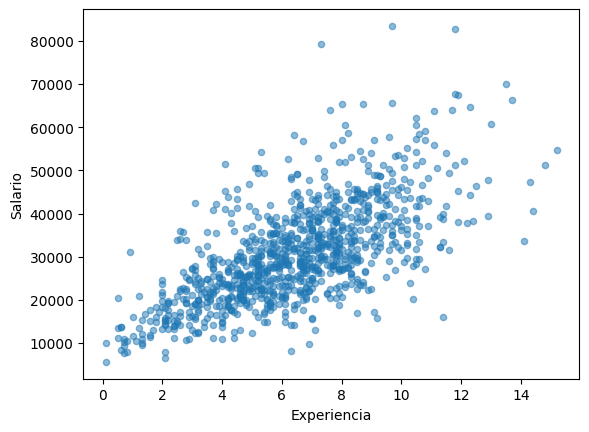

In [ ]:
"""
Este código en Python utiliza la biblioteca pandas junto con matplotlib para crear
un gráfico de dispersión (scatter plot) a partir de un conjunto de datos. }

datos = pd.concat([df_rrhh['Salario'], df_rrhh['Experiencia']], axis=1): En esta línea, se está utilizando la función concat()
de Pandas para concatenar dos columnas de un DataFrame llamado df_rrhh. Las columnas son 'Salario' y 'Experiencia'. axis=1 se usa
para concatenar a lo largo de las columnas.

datos.plot.scatter(x='Experiencia', y='Salario', alpha=0.5);: Después de crear el DataFrame datos que contiene las columnas de salario
y experiencia, se utiliza la función plot.scatter() para generar un gráfico de dispersión. Los parámetros x='Experiencia' y y='Salario'
indican qué columnas usar como coordenadas x e y respectivamente. El parámetro alpha=0.5 controla la transparencia de los puntos del gráfico.

En resumen, este código toma las columnas de Salario y Experiencia de un DataFrame, las coloca en un nuevo DataFrame y luego crea un gráfico
de dispersión donde la Experiencia se representa en el eje x y el Salario en el eje y, mostrando la relación entre ambas variables.

"""
datos = pd.concat([df_rrhh['Salario'], df_rrhh['Experiencia']], axis=1)
datos.plot.scatter(x='Experiencia', y='Salario', alpha = 0.5);

A partir del gráfico se puede señalar que existe una relación lineal positiva entre las variables Experiencia y Salario. Si se incrementa la experiencia se incremente el Salario. Si trazaramos una línea recta imaginaria que represente la relación entre las variables observaríamos que la mayoría de los puntos se concentran en torno a la recta, lo cual nos indica que hay una fuerte relación entre ambas variables.

In [ ]:
# Se utiliza el método de pandas .describe para obtener estadísticas descriptivas de cada columna numérica del data frame.
df_rrhh.describe()

,Experiencia,Hijos,Casado,Salario
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000
std,2.577612,1.208823,0.491138,11520.200049
min,0.100000,0.000000,0.000000,5630.000000
25%,4.600000,0.000000,0.000000,22557.500000
50%,6.400000,1.000000,1.000000,29470.000000
75%,8.100000,2.000000,1.000000,37922.500000
max,15.200000,4.000000,1.000000,83470.000000


Al utilizar el método de pandas .describe para obtener estadísticas descriptivas del data frame df_rrhh, se incluyen dos variables que en realidad no son cuantitativas (Hijos y Casado), por lo que a continuación se crea una algoritmo para que el método .describe se aplique solamente a las variables que realmente son cuantitativas (Experiencia y Salario).

In [ ]:

"""
Se crea un nuevo DataFrame llamado df_rrhh_select
a partir del DataFrame original df_rrhh. Se seleccionan únicamente las columnas
'Experiencia' y 'Salario' del DataFrame df_rrhh mediante el uso de dobles corchetes [['Experiencia', 'Salario']].

"""
df_rrhh_select = df_rrhh[['Experiencia', 'Salario']]  # Seleccionar las columnas deseadas

"""
Después, se utiliza el método describe() en el DataFrame df_rrhh_select. Este método
calcula estadísticas descriptivas para las columnas numéricas del DataFrame, como el
recuento de elementos, la media, la desviación estándar, los valores mínimo y máximo,
y los percentiles (25%, 50%, y 75%).

"""
descripcion = df_rrhh_select.describe()

"""
La función print() se utiliza para mostrar en la consola la descripción estadística
del DataFrame df_rrhh_select, que incluye todas esas estadísticas calculadas para
las columnas seleccionadas ('Experiencia' y 'Salario').

"""
print(descripcion)


       Experiencia       Salario
count  1000.000000   1000.000000
mean      6.416200  30787.060000
std       2.577612  11520.200049
min       0.100000   5630.000000
25%       4.600000  22557.500000
50%       6.400000  29470.000000
75%       8.100000  37922.500000
max      15.200000  83470.000000


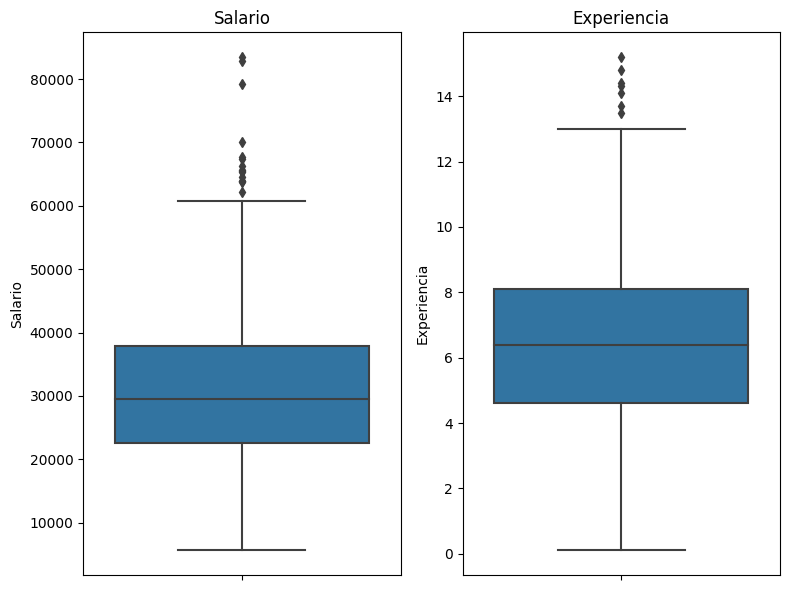

In [ ]:
# Se crea el lienzo de gráficos
plt.figure(figsize=(8, 6))

# Se grafican los boxplots de Salario y Experiencia
plt.subplot(1, 2, 1)
sns.boxplot(y=df_rrhh['Salario'])
plt.title('Salario')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_rrhh['Experiencia'])
plt.title('Experiencia')

# Se muestran los boxplots
plt.tight_layout()
plt.show()


Los límites inferiores de las cajas (Q1): representan el primer cuartil (Q1), es decir, el valor por debajo del cual se encuentra el 25% de los datos. En el caso de Salario el valor corresponde a 22557.5, en tanto que, para Experiencia vale 4.6.
La línea en el medio de la caja es la mediana (segundo cuartil o Q2), que indica el valor que separa el 50% inferior del 50% superior de los datos. En Salario su valor es 29470 y en Experiencia es 6.4.
El borde superior de la caja representa el tercer cuartil (Q3), donde se ubica el 75% de los datos. En Salario vale 37922.5 y en Experiencia 8.1.
Los puntos fuera de los bigotes se representan como valores atípicos o outliers. Estos son valores que caen significativamente por encima o por debajo del rango intercuartílico (normalmente 1.5 veces el IQR). Ambas boxplots presentan valores atípicos.
La longitud de la caja y la posición de la mediana dan una idea de la distribución y simetría de los datos. Una caja más larga indica una mayor dispersión, mientras que la simetría puede indicar una distribución más normal.
Experiencia parece tener una caja más larga, lo que indica una mayor dispersión que en Salario. La posición de la mediana indica una mayor simetría en la caja de Experiencia que en la de Salario, por lo que la primera tendría una distribución más normal que Salario.



In [ ]:
"""
Este código calcula el primer cuartil (Q1), el tercer cuartil (Q3) y el rango intercuartílico (IQR) para el dataframe
df_rrhh_select, y luego identifica valores atípicos basados en aquellos que están por debajo de Q1 - 1.5 * IQR
o por encima de Q3 + 1.5 * IQR.

La última línea print(outliers.sum()) cuenta el número total de valores atípicos encontrados.
Se imprime la cantidad total de valores atípicos detectados a lo
largo de las columnas en el dataframe.

"""
Q1 = df_rrhh_select.quantile(0.25)
Q3 = df_rrhh_select.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_rrhh_select < (Q1 - 1.5 * IQR)) | (df_rrhh_select > (Q3 + 1.5 * IQR)))
print(outliers.sum())


Experiencia     7
Salario        15
dtype: int64


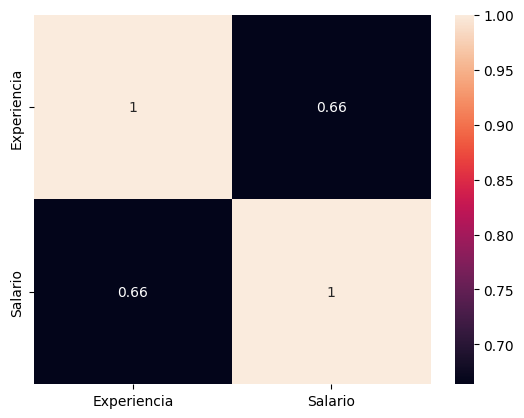

In [ ]:
"""
'correlation_matrix = df_rrhh_select.corr()': Este código calcula la matriz de correlación de las columnas
en el dataframe df_rrhh_select usando 'df_rrhh_select.corr()'. La matriz de correlación muestra cómo cada columna
se relaciona con las demás, indicando el grado de relación lineal entre pares de variables.
El resultado se almacena en la variable correlation_matrix.

"""
correlation_matrix = df_rrhh_select.corr()

"""
'sns.heatmap(correlation_matrix, annot=True)': sns es una abreviatura típica para seaborn,
 la biblioteca de visualización de datos de Python. 'sns.heatmap()' crea un mapa de calor (heatmap)
utilizando la matriz de correlación 'correlation_matrix'. Los mapas de calor son visualizaciones que asignan colores
a los valores en una matriz para que puedas identificar patrones fácilmente. El parámetro annot=True agrega los valores de la correlación
como anotaciones en las celdas del mapa de calor.

"""
sns.heatmap(correlation_matrix, annot=True)

"""
plt.show(): Esta línea muestra la visualización del mapa de calor generado por seaborn utilizando matplotlib (plt.show()).
Matplotlib es otra biblioteca de visualización de Python, y en este caso, se usa para mostrar la visualización generada por seaborn.

"""
plt.show()

In [ ]:
"""
Este código de Python hace uso de la librería pandas para trabajar con el DataFrame df_rrhh.

'df_rrhh['Posicion'].value_counts()' realiza lo siguiente:

'df_rrhh['Posicion']' accede a la columna llamada 'Posicion' en el DataFrame df_rrhh.
'.value_counts()' cuenta la frecuencia de cada valor único en la columna 'Posicion'.
El resultado es un conteo de cuántas veces aparece cada valor único en la columna 'Posicion'
del DataFrame 'df_rrhh'. Esto es útil para analizar la distribución de los diferentes tipos
de posiciones que pueden estar presentes en ese conjunto de datos específico.

"""
df_rrhh['Posicion'].value_counts()

Analista       790
Coordinador    151
Gerente         59
Name: Posicion, dtype: int64

In [ ]:
"""
Este código de Python hace uso de la librería pandas para trabajar con el DataFrame df_rrhh.

'df_rrhh['Educacion'].value_counts()' realiza lo siguiente:

'df_rrhh['Educacion']' accede a la columna llamada 'Educacion' en el DataFrame df_rrhh.
'.value_counts()' cuenta la frecuencia de cada valor único en la columna 'Educacion'.
El resultado es un conteo de cuántas veces aparece cada valor único en la columna 'Educacion'
del DataFrame 'df_rrhh'. Esto es útil para analizar la distribución de los diferentes tipos
de posiciones que pueden estar presentes en ese conjunto de datos específico.

"""

df_rrhh['Educacion'].value_counts()

Bachillerato    531
Licenciatura    369
Posgrado        100
Name: Educacion, dtype: int64

In [ ]:
"""
Este código de Python utiliza la función get_dummies de la librería pandas para realizar la codificación one-hot de las columnas
'Posicion' y 'Educacion' en el DataFrame df_rrhh.

'pd.get_dummies(df_rrhh, columns=['Posicion', 'Educacion'])' hace lo siguiente:

'df_rrhh': es el DataFrame original sobre el que se realizarán las transformaciones.
'columns=['Posicion', 'Educacion']': especifica las columnas que se van a codificar utilizando la técnica de one-hot encoding.
La función get_dummies convierte las columnas categóricas en representaciones numéricas, creando nuevas columnas binarias
para cada categoría única presente en las columnas 'Posicion' y 'Educacion'. Cada columna binaria representará la presencia
o ausencia de una categoría específica para cada fila de datos.

Por ejemplo, si tenemos una columna 'Posicion' con valores como 'Gerente', 'Analista', 'Asistente', después de aplicar get_dummies,
obtenemos tres nuevas columnas, una para cada posición, donde tengremos un valor de 1 si la fila pertenece a esa posición y 0 si no.

"""

df_rrhh = pd.get_dummies(df_rrhh, columns=['Posicion', 'Educacion'])

In [ ]:
"""
'X = df_rrhh.drop("Salario", axis=1)': Aquí se está creando una variable X que contendrá las características o variables
independientes para el modelo. Se está utilizando el DataFrame df_rrhh y se elimina la columna "Salario" utilizando drop.
El parámetro axis=1 indica que se eliminará una columna en lugar de una fila. Entonces, X contendrá todas las columnas del
DataFrame df_rrhh excepto la columna "Salario".

'y = df_rrhh["Salario"]': Esta línea crea una variable 'y' que contendrá la variable objetivo o variable dependiente para el modelo.
Se asigna la columna "Salario" del DataFrame df_rrhh a esta variable 'y'. En otras palabras, 'y' contendrá los valores de la columna "Salario".

"""
X = df_rrhh.drop("Salario", axis=1)
y = df_rrhh["Salario"]

In [ ]:
"""
Este código utiliza la función train_test_split de la librería sklearn (scikit-learn) para dividir los datos
en conjuntos de entrenamiento y prueba.

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)': Esta línea de código
toma las variables 'X' (características) y 'y' (variable objetivo) y las divide en cuatro conjuntos diferentes:
'X_train': Conjunto de características de entrenamiento. Contiene el 80% de los datos originales seleccionados de
forma aleatoria para entrenar el modelo.
'X_test': Conjunto de características de prueba. Contiene el 20% restante de los datos originales, que se
utilizarán para evaluar el modelo.
'y_train': Conjunto de valores objetivo de entrenamiento correspondientes a X_train.
'y_test': Conjunto de valores objetivo de prueba correspondientes a X_test.
Los parámetros utilizados:

'test_size=0.2': Indica que el 20% de los datos se utilizarán como datos de prueba (X_test e y_test), mientras que
el 80% restante se usará como datos de entrenamiento (X_train e y_train).
'random_state=42': Especifica una semilla para el generador de números aleatorios. Esto garantiza que la división
de datos sea reproducible; es decir, si vuelves a ejecutar este código con la misma semilla, obtendrás la misma
división de datos, lo que es útil para resultados consistentes en el desarrollo y pruebas del modelo.

"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
"""
Este código de Python utiliza la biblioteca scikit-learn para crear un modelo de regresión lineal y entrenarlo con los datos
de entrenamiento previamente divididos.

'model = LinearRegression()': Se crea una instancia del modelo de regresión lineal. En este caso, se está utilizando el modelo
de regresión lineal de la librería scikit-learn. La regresión lineal es un método estadístico que modela la relación entre
una variable dependiente y una o más variables independientes, asumiendo una relación lineal entre ellas.

'model.fit(X_train, y_train)': Utiliza el método fit() para entrenar el modelo con los datos de entrenamiento (X_train y y_train).
Este método ajusta el modelo a los datos, encontrando los coeficientes que minimizan la diferencia entre los valores reales de
la variable objetivo 'y_train' y los valores predichos por el modelo utilizando las características 'X_train'. En el caso de la regresión
lineal, se ajustará una línea (o hiperplano en dimensiones superiores) que mejor se ajuste a los datos de entrenamiento.

Una vez que se ha ejecutado el método fit(), el modelo ha sido entrenado y está listo para hacer predicciones sobre nuevos datos
o para evaluar su rendimiento utilizando los datos de prueba.

"""
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
"""
Este código de Python se utiliza para hacer predicciones sobre datos no vistos (datos de prueba) utilizando el modelo de regresión
lineal previamente entrenado.

'y_pred = model.predict(X_test)': Utiliza el método predict() del modelo entrenado (model) para hacer predicciones sobre las características
de prueba (X_test). Esto significa que el modelo utiliza las características del conjunto de prueba para predecir los valores correspondientes
de la variable objetivo.
El resultado se guarda en la variable 'y_pred', que contendrá las predicciones realizadas por el modelo de regresión lineal para los datos de prueba.
Estas predicciones son estimaciones de los valores de la variable objetivo (y) basadas en las características de prueba que el modelo no ha visto
durante el entrenamiento.

Una vez que se han obtenido estas predicciones (y_pred), se pueden comparar con los valores reales de la variable objetivo (y_test) para evaluar
la precisión y el rendimiento del modelo en datos que no fueron utilizados durante el entrenamiento. Esto es esencial para comprender qué tan
bien generaliza el modelo a nuevos datos.

"""
y_pred = model.predict(X_test)

In [ ]:
"""
Este código calcula varias métricas comunes para evaluar el rendimiento de un modelo de regresión en datos de prueba.

'mean_squared_error(y_test, y_pred)': Esta línea calcula el error cuadrático medio (MSE, por sus siglas en inglés)
entre los valores reales de la variable objetivo (y_test) y las predicciones hechas por el modelo (y_pred).
El MSE es una medida que cuantifica la cantidad promedio por la que las predicciones del modelo difieren de los valores
reales al cuadrado. Cuanto menor sea el MSE, mejor será el ajuste del modelo a los datos.

'mean_squared_error(y_test, y_pred, squared=False)': Esta línea calcula la raíz del error cuadrático medio (RMSE).
El RMSE es simplemente la raíz cuadrada del MSE y proporciona una medida del error en la misma escala que la variable
objetivo original. Es una métrica útil para comprender la magnitud real del error del modelo.

'r2_score(y_test, y_pred)': Calcula el coeficiente de determinación (R cuadrado o R²), que es una medida que indica
qué tan bien las predicciones del modelo se ajustan a los datos reales. Es una medida de bondad de ajuste que va
de 0 a 1, donde 1 indica un ajuste perfecto. Un valor más alto de R² indica que el modelo explica una mayor
variabilidad de los datos de prueba.

Estas métricas son comúnmente utilizadas para evaluar el rendimiento de modelos de regresión. El MSE y RMSE
miden la precisión de las predicciones, mientras que R² proporciona una idea de cuánta varianza del objetivo
se explica por el modelo. Evaluar múltiples métricas puede dar una imagen más completa del rendimiento del modelo.

"""
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [ ]:
"""
Este fragmento de código imprime en la consola las métricas de evaluación calculadas anteriormente para el modelo
de regresión en los datos de prueba.

'print(f"MSE: {mse}")': Imprime el valor del error cuadrático medio (MSE) en la consola. Utiliza una f-string para mostrar el
valor almacenado en la variable mse.

'print(f"RMSE: {rmse}")': Imprime el valor de la raíz del error cuadrático medio (RMSE) en la consola. Similar al caso anterior,
usa una f-string para mostrar el valor almacenado en la variable rmse.

'print(f"R2: {r2}")': Imprime el valor del coeficiente de determinación (R²) en la consola. Al igual que los casos anteriores,
utiliza una f-string para mostrar el valor almacenado en la variable r2.

Estas líneas de código son útiles para mostrar de manera legible las métricas de evaluación del modelo en la consola o en algún
entorno donde se visualicen los resultados. Es una práctica común para entender rápidamente qué tan bien está funcionando un
modelo en base a estas métricas.

"""

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 35606817.914109915
RMSE: 5967.144871218556
R2: 0.6509821573169725


In [ ]:
"""
Este código accede a los coeficientes del modelo de regresión lineal que fue entrenado previamente.

'model.coef_' se refiere a los coeficientes (también conocidos como pendientes o pesos) asociados a
cada una de las características (variables independientes) utilizadas en el modelo. En un modelo de regresión lineal,
estos coeficientes representan la contribución de cada característica en la predicción de la variable objetivo.

Estos coeficientes indican cuánto cambia la variable objetivo por cada unidad de cambio en la característica correspondiente, manteniendo todas
las demás características constantes.

Guardar estos coeficientes en la variable 'coefficients' permite su posterior uso, por ejemplo, para entender qué características
tienen un impacto más significativo en las predicciones del modelo o para realizar análisis adicionales sobre cómo cada característica
contribuye a las predicciones del modelo de regresión.

"""
coefficients = model.coef_

"""
Este código itera a través de los coeficientes obtenidos del modelo de regresión lineal y los imprime
junto con el nombre de la variable correspondiente.

'for i, coef in enumerate(coefficients):': Este bucle for itera a través de los coeficientes almacenados
en la variable coefficients. La función 'enumerate()' agrega un contador 'i' a medida que itera a través
de la lista de coeficientes. 'coef' representa cada coeficiente en la iteración actual.

'print(f"Coeficiente para la variable {X_train.columns[i]}: {coef}")': En cada iteración del bucle, se imprime
el coeficiente actual y el nombre de la variable correspondiente en 'X_train.columns[i]'.

'X_train.columns[i]' accede al nombre de la columna de las características de entrenamiento en la posición 'i'.
'{coef}' muestra el valor del coeficiente en esa iteración, mientras que '{X_train.columns[i]}' muestra el nombre
de la variable correspondiente a ese coeficiente.
Este bucle imprime cada coeficiente junto con el nombre de la variable a la que corresponde.
Es útil para entender cómo cada característica influye en las predicciones del modelo, mostrando sus respectivos
pesos o contribuciones en la predicción de la variable objetivo.

"""
for i, coef in enumerate(coefficients):
    print(f"Coeficiente para la variable {X_train.columns[i]}: {coef}")


Coeficiente para la variable Experiencia: 2973.6899769975125
Coeficiente para la variable Hijos: 1786.3208587132058
Coeficiente para la variable Casado: 78.57229901614653
Coeficiente para la variable Posicion_Analista: -7824.334599159922
Coeficiente para la variable Posicion_Coordinador: -3448.1338169171377
Coeficiente para la variable Posicion_Gerente: 11272.468416077061
Coeficiente para la variable Educacion_Bachillerato: -2737.393075986544
Coeficiente para la variable Educacion_Licenciatura: -342.18784865210955
Coeficiente para la variable Educacion_Posgrado: 3079.5809246386507


A continuación se realiza la estandarización de las variables predictoras cuantitativas para comparar el nuevo modelo con el anterior y ver si
existe una mejora en la capacidad predictiva. La única variable que recibirá el tratamiento de estandarización es 'Experiencia', dado que las demás predictoras son todas cualitativas incluida la variable Hijos (que se refiere a categorías, ya que no se puede tener, 1/2 hijo o 1/4 hijo).

In [ ]:
"""
Se utiliza el módulo 'StandardScaler' de la librería 'sklearn.preprocessing' en Python.
La función 'StandardScaler' se utiliza para estandarizar características al remover la media
y escalando los datos a la varianza unitaria. Aquí, la variable 'scaler' está siendo inicializada
como un objeto de la clase 'StandardScaler()' sin ningún argumento específico en la inicialización.

"""
scaler = StandardScaler()


In [ ]:
"""
Este fragmento de código en Python estandariza una sola columna ('Experiencia')
del conjunto de datos de entrenamiento ('X_train') utilizando el objeto scaler previamente creado.

'experiencia_columna_train = X_train[['Experiencia']]': Selecciona la columna 'Experiencia' del DataFrame 'X_train'
y la almacena en la variable 'experiencia_columna_train'. La doble corchete [['Experiencia']] se utiliza
para seleccionar esta columna específica como un DataFrame en lugar de una Serie.

'experiencia_estandarizada_train = scaler.fit_transform(experiencia_columna_train)': Aplica la transformación de estandarización
a la columna 'Experiencia' seleccionada. La función 'fit_transform()' primero ajusta el 'scaler' utilizando los datos
de 'experiencia_columna_train' (calculando la media y la desviación estándar) y luego transforma estos datos para estandarizarlos.

'fit_transform()' combina los pasos de ajuste (fit()) y transformación (transform()) en uno solo. Ajusta el scaler utilizando
los datos proporcionados y luego transforma esos datos estandarizándolos.
El resultado final se almacena en la variable 'experiencia_estandarizada_train', que contendrá la columna 'Experiencia' de 'X_train'
después de haber sido estandarizada utilizando el 'scaler'. Este proceso asegura que los datos estén estandarizados,
es decir, que tengan una media de 0 y una desviación estándar de 1.

"""
experiencia_columna_train = X_train[['Experiencia']]
experiencia_estandarizada_train = scaler.fit_transform(experiencia_columna_train)

In [ ]:
"""
Este fragmento de código asigna los datos estandarizados de la columna 'Experiencia'
de vuelta al DataFrame original 'X_train'.

'X_train['Experiencia'] = experiencia_estandarizada_train': Toma los datos estandarizados de la columna 'Experiencia'
almacenados en la variable 'experiencia_estandarizada_train' y los asigna de nuevo a la columna 'Experiencia' en el DataFrame 'X_train'.

Esto significa que los valores de 'Experiencia' en 'X_train' se actualizan con los valores estandarizados que fueron calculados
y almacenados en 'experiencia_estandarizada' anteriormente.
Después de esta línea de código, la columna 'Experiencia' en el DataFrame 'X_train' contendrá los datos estandarizados,
es decir, los valores de 'Experiencia' se habrán transformado para tener una media de aproximadamente 0 y una desviación
estándar de aproximadamente 1.

"""
X_train['Experiencia'] = experiencia_estandarizada_train


In [ ]:
"""
Se utiliza el método de Pandas 'head()'para mostrar las primeras filas del Data Frame X_train, y se
puede observar como los valores de la variable 'Experiencia' aparecen ahora estandarizados.

"""
X_train.head()

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
29,0.060645,2,1,1,0,0,1,0,0
535,0.252409,1,1,1,0,0,1,0,0
695,0.022293,1,1,1,0,0,0,0,1
557,-0.668058,2,1,1,0,0,0,1,0
836,0.789349,2,1,1,0,0,1,0,0


In [ ]:
# Se selecciona solo la columna 'Experiencia' y se la estandariza
experiencia_columna_test = X_test[['Experiencia']]
experiencia_estandarizada_test = scaler.transform(experiencia_columna_test)

In [ ]:
# Se reemplaza la columna 'Experiencia' en X_test con los valores estandarizados
X_test['Experiencia'] = experiencia_estandarizada_test
# Ahora X_test tiene 'Experiencia' estandarizada y las otras columnas intactas

In [ ]:
"""
Se utiliza el método de Pandas 'head()'para mostrar las primeras filas del Data Frame X_test, y se
puede observar como los valores de la variable 'Experiencia' aparecen ahora estandarizados.

"""
X_test.head()

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
521,0.137351,3,1,1,0,0,1,0,0
737,1.633110,3,1,0,1,0,0,1,0
740,-0.322883,2,1,1,0,0,1,0,0
660,-0.629705,1,1,1,0,0,1,0,0
411,0.482526,0,1,1,0,0,1,0,0


In [ ]:
"""
En esta línea, se crea una instancia de la clase 'LinearRegression()' de 'scikit-learn'. Este objeto 'model1' representa
el modelo de regresión lineal que se utilizará para realizar predicciones basadas en el algoritmo de regresión lineal.

"""
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
"""
Este código de Python se utiliza para hacer predicciones sobre datos no vistos (datos de prueba)
utilizando el modelo de regresión lineal previamente entrenado.

"""
y_pred1 = model1.predict(X_test)

In [ ]:
"""
Este fragmento de código imprime en la consola las métricas de evaluación calculadas
anteriormente para el modelo de regresión en los datos de prueba.

"""
mse = mean_squared_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
r2 = r2_score(y_test, y_pred1)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 35606817.91410991
RMSE: 5967.144871218556
R2: 0.6509821573169725


El valor de R2 se mantiene igual después de aplicar la estandarización a los datos de ambos modelos de regresión lineal, a partir de esto se puede concluir:

1.Independencia de la escala: La estandarización no afecta la relación entre las variables. Si el R2 se mantiene constante después de la estandarización, esto sugiere que la escala original de las características no estaba influyendo en el rendimiento del modelo. Esto es común en modelos de regresión lineal, ya que el modelo trata con coeficientes que ajustan la relación entre variables, independientemente de la escala original.

2.Variables no afectadas por la estandarización: Puede que las características no se hayan beneficiado de la estandarización en este caso particular. Si las variables no tenían escalas muy diferentes o si el algoritmo de regresión lineal pudo manejar adecuadamente las escalas originales, la estandarización no tendría un impacto significativo en el R2.

Coeficientes e interpretación: La estandarización cambia la escala de las variables, pero no cambia la relación lineal entre las características y el objetivo. Los coeficientes del modelo pueden cambiar después de la estandarización, pero la interpretación de la relación entre las variables se mantiene.

En síntesis, dado que R2 se mantiene constante después de la estandarización, es posible concluir que la estandarización no tuvo un impacto significativo en el rendimiento del modelo de regresión lineal para este conjunto de datos específico. Esto no significa que la estandarización sea inútil; en diferentes situaciones y con otros algoritmos, la estandarización puede tener un efecto más notable en el rendimiento del modelo.








## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.

**Segunda parte**

In [ ]:
# Se importan las bibliotecas necesarias para implementar el modelo de Regresión Logística.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Cargamos los datos desde el archivo descargado
rr_hh2 = pd.read_csv("/content/drive/MyDrive/rrhh_2.csv")

In [ ]:
"""
Se utiliza el método .head( ) de pandas para que devuelva las primeras 5 filas del data frame.
De esta manera se busca conocer más acerca de las variables.

"""
rr_hh2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
"""Se utiliza la función .info( ) que nos devuelve información(número de filas, número de columnas,
 índices, tipos de las columnas y memoria usada) sobre el data frame."""

rr_hh2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


El data Frame rr_hh2 tiene 7 variables, de las cuales, Salario y Experiencia son cuantitativas, en tanto que, Posición, Hijos, Casado, Educación y Contratado son cualitativas.

In [ ]:
# Se comprueba la completitud de las variables que componen nuestro conjunto de datos.
completitud = pd.DataFrame(rr_hh2.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / rr_hh2.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,Experiencia,0,100.0
1,Posicion,0,100.0
2,Hijos,0,100.0
3,Casado,0,100.0
4,Educacion,0,100.0
5,Salario,0,100.0
6,Contratado,0,100.0


Todas las variables que componen la base de datos presentan una completitud del 100 %, por lo que no hay un problema de datos nulos.

In [ ]:
# Se cuenta la frecuencia de cada valor único en la columna 'Contratado'
valores_categorias = rr_hh2['Contratado'].value_counts()

# Imprimimos los valores únicos y sus frecuencias
print(valores_categorias)


1    518
0    482
Name: Contratado, dtype: int64


La variable Contratado tiene valor 1 si el postulante fue contratado y 0 si no lo fue. Se observa que hay más casos de contratados (518) que de no contratados (482).

In [ ]:
# Se convierte las variables categóricas en variables dummy
rr_hh2 = pd.get_dummies(rr_hh2, columns=['Posicion', 'Educacion'])

In [ ]:
# Imprimimos los primeros cinco registros de 'rr_hh2' para comprobar el cambio sobre las variables cualitativas.
rr_hh2.head()

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,1,0,0,1,0,0
1,5.6,2,0,31240,0,1,0,0,0,1,0
2,11.7,1,0,63880,0,1,0,0,0,1,0
3,5.2,2,1,29960,1,1,0,0,0,1,0
4,7.2,2,1,34710,1,0,1,0,0,1,0


In [ ]:
# Se divide el conjunto de datos en variables predictoras (X2) y variable objetivo (y2)
X2 = rr_hh2.drop("Contratado", axis=1)
y2 = rr_hh2["Contratado"]
# 'Contratado' será la variable objetivo del estudio.

In [ ]:
# Se divide el conjunto de datos en entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


**Se estandarizan las variables cuantitativas predictoras** que componen los conjuntos de datos de entrenamiento y prueba, para comparar el efecto de la estandarización con el de la no estandarización en la capacidad clasificatoria del modelo.

In [ ]:
# Establecemos la lista de columnas a estandarizar
columnas_a_estandarizar = ['Experiencia', 'Salario']

In [ ]:
# Seleccionamos las columnas a estandarizar en el conjunto de entrenamiento
columnas_seleccionadas_train2 = X2_train[columnas_a_estandarizar]


In [ ]:
# Se inicializa el StandardScaler
scaler2 = StandardScaler()

In [ ]:
# Estandarizamos las columnas seleccionadas en el conjunto de entrenamiento
columnas_estandarizadas_train2 = scaler2.fit_transform(columnas_seleccionadas_train2)


In [ ]:
"""
'X2_train_estandarizado = X2_train.copy()': Esta línea crea una copia del DataFrame original X2_train utilizando
el método copy(). Hacer una copia es una práctica común para evitar modificar directamente el DataFrame original
y trabajar con una versión independiente para realizar transformaciones.

'X2_train_estandarizado[columnas_a_estandarizar] = columnas_estandarizadas_train2': Esta línea asigna los valores estandarizados
(columnas_estandarizadas_train2) a las columnas especificadas (columnas_a_estandarizar) en el DataFrame 'X2_train_estandarizado'.
Aquí, se actualizan las columnas seleccionadas en la copia del DataFrame original con los valores estandarizados.

En resumen, el código crea una copia del DataFrame de entrenamiento y luego reemplaza las columnas seleccionadas en
la copia con sus valores estandarizados, manteniendo las demás columnas intactas en la copia del DataFrame original.

"""
X2_train_estandarizado = X2_train.copy()
X2_train_estandarizado[columnas_a_estandarizar] = columnas_estandarizadas_train2


In [ ]:
# Se imprimem los 5 primeros registros de 'X2_train_estandarizado' para comprobar el cambio en las variables 'Experiencia' y 'Salario'.
X2_train_estandarizado.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
29,0.060645,2,1,-0.015102,1,0,0,1,0,0
535,0.252409,1,1,-1.507071,1,0,0,1,0,0
695,0.022293,1,1,1.111900,1,0,0,0,0,1
557,-0.668058,2,1,0.220605,1,0,0,0,1,0
836,0.789349,2,1,1.149072,1,0,0,1,0,0


In [ ]:
# Seleccionamos las mismas columnas en el conjunto de prueba
columnas_seleccionadas_test2 = X2_test[columnas_a_estandarizar]

In [ ]:
# Estandarizamos las columnas seleccionadas en el conjunto de prueba
columnas_estandarizadas_test2 = scaler2.transform(columnas_seleccionadas_test2)

In [ ]:
"""
El código crea una copia del DataFrame de prueba y luego reemplaza las columnas seleccionadas en
la copia con sus valores estandarizados, manteniendo las demás columnas intactas en la copia del DataFrame original.

"""
X2_test_estandarizado = X2_test.copy()
X2_test_estandarizado[columnas_a_estandarizar] = columnas_estandarizadas_test2

In [ ]:
# Se imprimem los 5 primeros registros de 'X2_train_estandarizado' para comprobar el cambio en las variables 'Experiencia' y 'Salario'.
X2_test_estandarizado.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
521,0.137351,3,1,0.147105,1,0,0,1,0,0
737,1.633110,3,1,1.327331,0,1,0,0,1,0
740,-0.322883,2,1,-0.010878,1,0,0,1,0,0
660,-0.629705,1,1,-0.266861,1,0,0,1,0,0
411,0.482526,0,1,0.254398,1,0,0,1,0,0


**Se crea, entrena y realiza el análisis de los datos con los conjuntos sin estandarizar.** Luego se hará lo mismo con los datos estandarizados para comparar los resultados.

In [ ]:
# Se crea y entrena el modelo de regresión logística sin los datos estandarizados.
model_linear = LogisticRegression()
model_linear.fit(X2_train, y2_train)

LogisticRegression()

In [ ]:
# Se realizan las predicciones en el conjunto de prueba sin los datos estandarizados.
y2_pred = model_linear.predict(X2_test)

In [ ]:
# Se calcula la precisión del modelo sin los datos estandarizados.
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.68


En un modelo de regresión logística, el accuracy score de 0.68 indica la precisión del modelo para predecir correctamente las clases. Este puntaje sugiere que el modelo acierta en aproximadamente el 68 % de las predicciones. Es importante considerar el contexto del problema y la distribución de clases en los datos. Un accuracy score del 0.68 puede ser bueno o no, dependiendo de la naturaleza específica del problema y de los estándares de precisión requeridos.

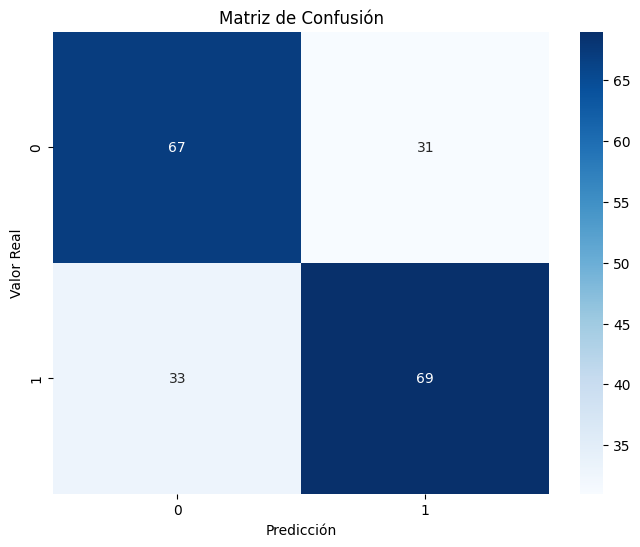

In [ ]:
# Se calcula la matriz de confusión
conf_matrix = confusion_matrix(y2_test, y2_pred)

# Graficamos un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
"""
Este código en Python utiliza la librería pandas para crear un DataFrame a partir de una matriz de
confusión generada por el método confusion_matrix de sklearn.metrics.
'conf_matrix = confusion_matrix(y2_test, y2_pred)': Se calcula la matriz de confusión utilizando
la función confusion_matrix de sklearn.metrics. Esta función toma dos argumentos, y2_test (las etiquetas reales)
y y2_pred (las etiquetas predichas por el modelo). Genera una matriz que contiene los recuentos de verdaderos positivos,
falsos positivos, verdaderos negativos y falsos negativos.

"""
conf_matrix = confusion_matrix(y2_test, y2_pred)

"""
Se crea un DataFrame de Pandas (confusion_df) usando pd.DataFrame(). Toma la matriz de confusión (conf_matrix)
como datos y establece etiquetas personalizadas para las filas y columnas.

'columns=['Predicted 0', 'Predicted 1']': Etiqueta las columnas del DataFrame con los nombres 'Predicción 0' y 'Predicción 1',
correspondientes a las predicciones hechas por el modelo para las clases 0 y 1, respectivamente.

'index=['Real 0', 'Real 1']': Etiqueta las filas del DataFrame con los nombres 'Real 0' y 'Real 1',
correspondientes a las clases reales en los datos de prueba.

"""

confusion_df = pd.DataFrame(conf_matrix,
                             columns=['Predicción 0', 'Predicción 1'],
                             index=['Real 0', 'Real 1'])

"""
print(confusion_df): Imprime en la consola el DataFrame creado, que representa la matriz de confusión de manera más legible
y estructurada, mostrando las predicciones del modelo versus las clases reales.

"""


print(confusion_df)


        Predicción 0  Predicción 1
Real 0            67            31
Real 1            33            69


A partir de la observación de los resultados de la matriz de confusión y el mapa de calor se puede señalar que el modelo es mejor para predecir la clase 1 (los que fueron contratados) que los no contratados (clase 0). Esto se relaciona con el hecho de que el data frame rr_hh2 tiene más casos de los que fueron contratados (clase 1). Sin embargo, se puede señalar que no hay una diferencia demasiado grande en la capacidad predictiva, sino que, están casi en los mismos valores.

In [ ]:
"""
'model_linear.score(X2_test, y2_test)': El método score se utiliza para evaluar el rendimiento del modelo 'model_linear'
en un conjunto de datos de prueba. Toma dos argumentos:

'X2_test': Las características del conjunto de datos de prueba.
'y2_test': Las etiquetas verdaderas (reales) correspondientes a las características del conjunto de datos de prueba.
print('Score: {:.2f}'.format(model_linear.score(X2_test, y2_test))): Imprime en la consola el puntaje de precisión
del modelo en el conjunto de datos de prueba. Utiliza la función format() para mostrar el puntaje con dos decimales ({:.2f})
y lo sustituye en la cadena de texto 'Score: {:.2f}'. El puntaje de precisión se muestra como un número decimal con dos cifras
después del punto decimal.

Este código es útil para obtener una medida de qué tan preciso es el modelo en la predicción de las etiquetas de un conjunto de datos
de prueba específico. El puntaje de precisión es una métrica comúnmente utilizada para evaluar el rendimiento de modelos
en problemas de clasificación.

"""
print('Score: {:.2f}'.format(model_linear.score(X2_test, y2_test)))


Score: 0.68


In [ ]:
"""
Este código de Python utiliza la función classification_report de la librería sklearn.metrics para generar un informe detallado que
resume la precisión, recall, F1-score y otras métricas para cada clase en un problema de clasificación.

Aquí está el desglose del código:

'classification_report(y2_test, y2_pred)': Esta función toma dos argumentos:

'y2_test': Las etiquetas verdaderas (reales) del conjunto de datos de prueba.
'y2_pred': Las etiquetas predichas por el modelo para el conjunto de datos de prueba.
'print(classification_report(y2_test, y2_pred))': Imprime en la consola un informe detallado que contiene varias métricas de evaluación
para cada clase en el conjunto de datos de prueba. Este informe incluye métricas como precisión, recall, F1-score y el soporte
(número de muestras verdaderas) para cada clase.

Precisión (Precision): Proporción de verdaderos positivos respecto a la suma de verdaderos positivos y falsos positivos.
Mide la precisión de las predicciones positivas del modelo.
Recall (Sensibilidad): Proporción de verdaderos positivos respecto a la suma de verdaderos positivos y falsos negativos.
Mide la capacidad del modelo para identificar correctamente muestras positivas.
F1-score: Promedio armónico de precisión y recall. Es útil cuando hay un desequilibrio entre las clases.
Soporte (Support): Número de ocurrencias reales de cada clase en el conjunto de datos de prueba.
Este informe es valioso para comprender cómo el modelo de clasificación se desempeña en la identificación de diferentes
clases y proporciona una visión detallada del rendimiento del modelo para cada etiqueta/clase en particular.
Ayuda a identificar si el modelo es más preciso en algunas clases que en otras y permite tomar decisiones informadas
sobre la eficacia del modelo de clasificación.

"""

print(classification_report(y2_test, y2_pred))


              precision    recall  f1-score   support

           0       0.67      0.68      0.68        98
           1       0.69      0.68      0.68       102

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



La métrica de **precisión** indica que la precisión de las predicciones positivas del modelo es levemente mayor para la clase 1 (contratados).
El valor de **Recall** o **sensibilidad**, indica que la capacidad del modelo para identificar correctamente muestras positivas es igual para la case 1 (contratados) que para la clase 0 (no contratados).
F1-score: Promedio armónico de precisión y recall. Es útil cuando hay un desequilibrio entre las clases. Muestra que el modelo es igual de bueno para ambas clases.


**Se crea, entrena y realiza el análisis de los datos con los conjuntos  estandarizados.** Ahora se desarrolla exactamente el mismo procedimiento solo que se utilizan las variables predictoras cuantitativas estandarizadas.

In [ ]:
# Se crea y entrena el modelo de regresión logística con los datos estandarizados.
model_linear1 = LogisticRegression()
model_linear1.fit(X2_train_estandarizado, y2_train)

LogisticRegression()

In [ ]:
# Se realizan las predicciones en el conjunto de prueba con los datos estandarizados.
y2_pred_estandarizado = model_linear1.predict(X2_test_estandarizado)

In [ ]:
# Se calcula la precisión del modelo con los datos estandarizados.
accuracy = accuracy_score(y2_test, y2_pred_estandarizado)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.71


En un modelo de regresión logística, el accuracy score de 0.71 indica la precisión del modelo para predecir correctamente las clases. Este puntaje sugiere que el modelo acierta en aproximadamente el 71 % de las predicciones. Esto muestra que la estandarización permitió una leve mejora en la precisión del modelo para predecir correctamente las clases.

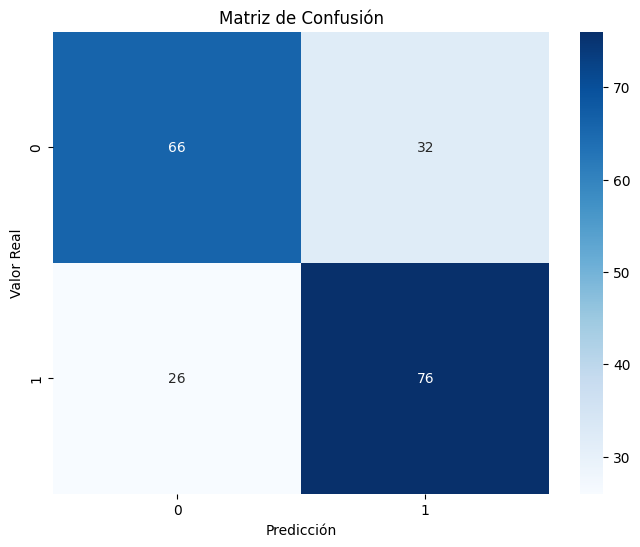

In [ ]:
# Se calcula la matriz de confusión con los datos estandarizados.
conf_matrix = confusion_matrix(y2_test, y2_pred_estandarizado)

# Graficamos un mapa de calor de la matriz de confusión con los datos estandarizados.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
"""
Este código en Python utiliza la librería pandas para crear un DataFrame a partir de una matriz de
confusión generada por el método confusion_matrix de sklearn.metrics.
'conf_matrix = confusion_matrix(y2_test, y2_pred)': Se calcula la matriz de confusión utilizando
la función confusion_matrix de sklearn.metrics. Esta función toma dos argumentos, y2_test (las etiquetas reales)
y y2_pred_estandarizado (las etiquetas predichas por el modelo). Genera una matriz que contiene los recuentos de verdaderos positivos,
falsos positivos, verdaderos negativos y falsos negativos.

"""
conf_matrix = confusion_matrix(y2_test , y2_pred_estandarizado)

"""
Se crea un DataFrame de Pandas (confusion_df) usando pd.DataFrame(). Toma la matriz de confusión (conf_matrix)
como datos y establece etiquetas personalizadas para las filas y columnas.

'columns=['Predicted 0', 'Predicted 1']': Etiqueta las columnas del DataFrame con los nombres 'Predicción 0' y 'Predicción 1',
correspondientes a las predicciones hechas por el modelo para las clases 0 y 1, respectivamente.

'index=['Real 0', 'Real 1']': Etiqueta las filas del DataFrame con los nombres 'Real 0' y 'Real 1',
correspondientes a las clases reales en los datos de prueba.

"""

confusion_df = pd.DataFrame(conf_matrix,
                             columns=['Predicción 0', 'Predicción 1'],
                             index=['Real 0', 'Real 1'])

"""
print(confusion_df): Imprime en la consola el DataFrame creado, que representa la matriz de confusión de manera más legible
y estructurada, mostrando las predicciones del modelo versus las clases reales.

"""


print(confusion_df)


        Predicción 0  Predicción 1
Real 0            66            32
Real 1            26            76


A partir de la observación de los resultados de la matriz de confusión y el mapa de calor se puede señalar que el modelo es mejor para predecir la clase 1 (los que fueron contratados) que los no contratados (clase 0). Esto se relaciona con el hecho de que el data frame rr_hh2 tiene más casos de los que fueron contratados (clase 1). Luego de estandarizar los datos aumenta la diferencia en la capacidad predictiva del modelo hacia la clase 1 (los que fueron contratados).

In [ ]:
"""
'model_linear1.score(X2_test_estandarizado, y2_test)': El método score se utiliza para evaluar el rendimiento del modelo 'model_linear1'
en un conjunto de datos de prueba. Toma dos argumentos:

'X2_test_estandarizado': Las características del conjunto de datos de prueba.
'y2_test': Las etiquetas verdaderas (reales) correspondientes a las características del conjunto de datos de prueba.
print('Score: {:.2f}'.format(model_linear1.score(X2_test_estandarizado, y2_test))): Imprime en la consola el puntaje de precisión
del modelo en el conjunto de datos de prueba. Utiliza la función format() para mostrar el puntaje con dos decimales ({:.2f})
y lo sustituye en la cadena de texto 'Score: {:.2f}'. El puntaje de precisión se muestra como un número decimal con dos cifras
después del punto decimal.

Este código es útil para obtener una medida de qué tan preciso es el modelo en la predicción de las etiquetas de un conjunto de datos
de prueba específico. El puntaje de precisión es una métrica comúnmente utilizada para evaluar el rendimiento de modelos
en problemas de clasificación.

"""
print('Score: {:.2f}'.format(model_linear1.score(X2_test_estandarizado, y2_test)))


Score: 0.71


In [ ]:
"""
Este código de Python utiliza la función classification_report de la librería sklearn.metrics para generar un informe detallado que
resume la precisión, recall, F1-score y otras métricas para cada clase en un problema de clasificación.

Aquí está el desglose del código:

'classification_report(y2_test, y2_pred_estandarizado)': Esta función toma dos argumentos:

'y2_test': Las etiquetas verdaderas (reales) del conjunto de datos de prueba.
'y2_pred_estandarizado': Las etiquetas predichas por el modelo para el conjunto de datos de prueba.
'print(classification_report(y2_test, y2_pred_estandarizado))': Imprime en la consola un informe detallado que contiene varias métricas de evaluación
para cada clase en el conjunto de datos de prueba. Este informe incluye métricas como precisión, recall, F1-score y el soporte
(número de muestras verdaderas) para cada clase.

Precisión (Precision): Proporción de verdaderos positivos respecto a la suma de verdaderos positivos y falsos positivos.
Mide la precisión de las predicciones positivas del modelo.
Recall (Sensibilidad): Proporción de verdaderos positivos respecto a la suma de verdaderos positivos y falsos negativos.
Mide la capacidad del modelo para identificar correctamente muestras positivas.
F1-score: Promedio armónico de precisión y recall. Es útil cuando hay un desequilibrio entre las clases.
Soporte (Support): Número de ocurrencias reales de cada clase en el conjunto de datos de prueba.
Este informe es valioso para comprender cómo el modelo de clasificación se desempeña en la identificación de diferentes
clases y proporciona una visión detallada del rendimiento del modelo para cada etiqueta/clase en particular.
Ayuda a identificar si el modelo es más preciso en algunas clases que en otras y permite tomar decisiones informadas
sobre la eficacia del modelo de clasificación.

"""

print(classification_report(y2_test, y2_pred_estandarizado))


              precision    recall  f1-score   support

           0       0.72      0.67      0.69        98
           1       0.70      0.75      0.72       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



Luego de la estandarización:
La métrica de **precisión** indica que la precisión de las predicciones positivas del modelo es levemente mayor para la clase 0 (no contratados) que para la clase 1 (contratados). Se invierte la relación que se observaba entre el modelo y las variables antes de realizar la estandarización.
El valor de **Recall** o **sensibilidad**, indica que la capacidad del modelo para identificar correctamente muestras positivas es mayor para la case 1 (contratados) que para la clase 0 (no contratados). Lo que también es distinto luego de estndarizar los datos en relación a lo observado sin estandarizar.
F1-score: Promedio armónico de precisión y recall. Es útil cuando hay un desequilibrio entre las clases. Muestra que el modelo es mejor para predecir la clase 1 (contratados) que la clase 0 (no contratados), lo cual también es distinto a lo que sucedía sin estandarización.